# Wallace Esteves de Carvalho
### Student ID : 2020326

Fig. 1 
(a)	The graph in Fig. 1 is a visualisation of the problem. 


Questions 
1	A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages. 
(a)	The graph in Fig. 1 is a visualisation of the problem. 
(i)	Identify the differences between a graph and a tree.  
(ii)	Explain in detail how the graph is an abstraction of the problem. 
(iii)	Identify the advantages of using a visualisation such as the one shown in Fig. 1. 
(b)	Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage. 
2	The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed. 


# 

### i Identify the differences between a graph and a tree

Structure: Think of a graph as a web where nodes are linked together by the edges. In this web, you can circle back to the same point by following different paths. A tree, on the other hand, is like a family tree. It's special because you can't go in loopsm each member (node) comes from exactly one parent, except for the ancestor at the top (the root).

Connectivity: In a tree, if you're trying to get from one member to another, there's only one way to trace your lineage without repeating steps. But in a graph, it's like having multiple roads between cities – you can take different routes to reach the same destination.

Hierarchy: Trees are like a kingdom where there's one ruler at the top (the root), and everyone else falls under them in a clear order. Graphs are more like a network of friends; there's no compulsory top dog or a structured pecking orde





### ii  Explain in detail how the graph is an abstraction of the problem.

Representation of States and Transitions: Each node in the graph can represent a state or stage in a puzzle, and edges represent possible transitions or steps from one state to another. This simplifies the complexity of the problem by breaking it down into discrete, manageable parts.

Simplification and Focus: The graph abstracts the puzzle, reducing it to essential elements (states and transitions). This focus allows for easier identification of possible solutions and pathways, stripping away extraneous details that might complicate problem-solving.

Visualization of Complex Relationships: The graphical representation helps in visualizing how different stages are interconnected. It makes it easier to see how one might progress from the start (A) to the solution (S), considering various intermediary steps.

### iii  Identify the advantages of using a visualisation such as the one shown in Fig. 1

The visual format allows for quick identification of potential paths to the solution. It's easier to spot direct routes, possible shortcuts, or dead ends. Visualization aids in strategizing the approach to the problem, helping in planning routes, anticipating challenges, and understanding the relationship between different stages more effectively. Additionally, in a team or educational setting, a visual representation like this graph makes it easier to communicate ideas, discuss strategies, and collaborate on finding solutions.tions.

# Creating the graphic

In [3]:

import networkx as nx
import matplotlib.pyplot as plt

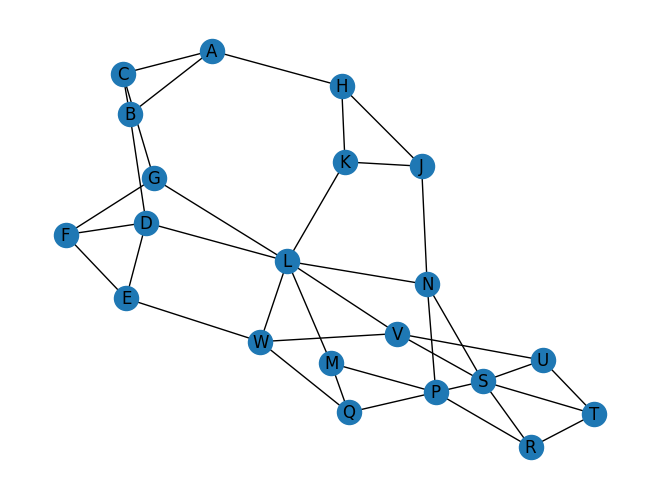

In [9]:
graph = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'A': 1, 'C': 2, 'D': 4},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'E': 4, 'F': 7},
    'E': {'D': 4, 'F': 3, 'W': 6},
    'F': {'D': 7, 'E': 3, 'G': 2},
    'G': {'C': 1, 'F': 2, 'L': 3},
    'H': {'A': 2, 'J': 9, 'K': 5},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'D': 7, 'G': 3, 'K': 5, 'M': 4, 'N': 3, 'V': 10, 'W': 8},
    'M': {'L': 4, 'P': 2, 'Q': 10},
    'N': {'J': 6, 'L': 3, 'P': 4, 'S': 7},
    'P': {'M': 2, 'N': 4, 'R': 5},
    'Q': {'M': 10, 'S': 8, 'W': 4},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'N': 7, 'Q': 8, 'R': 4, 'T': 4, 'U': 2, 'V': 6},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'S': 2, 'T': 1, 'V': 3},
    'V': {'L': 10, 'S': 6, 'U': 3, 'W': 5},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5},
}

G = nx.Graph(graph)


nx.draw(G, with_labels=True)
plt.show()

## (b)	Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage. 

In [15]:
import heapq

def dijkstra(graph, start, end):
    queue = [(0, start, ())]  
    seen = set()
    while queue:
        (cost, v1, path) = heapq.heappop(queue)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == end:
                return (cost, path)

            for v2, c in graph.get(v1, {}).items():
                if v2 in seen: continue
                next = cost + c
                heapq.heappush(queue, (next, v2, path))
    return float("inf"), []

shortest_distance, shortest_path  = dijkstra(graph, 'A', 'S')


def extract_path(stack):
    path = []
    while stack:
        node, stack = stack
        path.append(node)
    return path[::-1]  


shortest_path = extract_path(shortest_path)

(shortest_distance, shortest_path)



(17, ['A', 'B', 'C', 'G', 'L', 'N', 'S'])

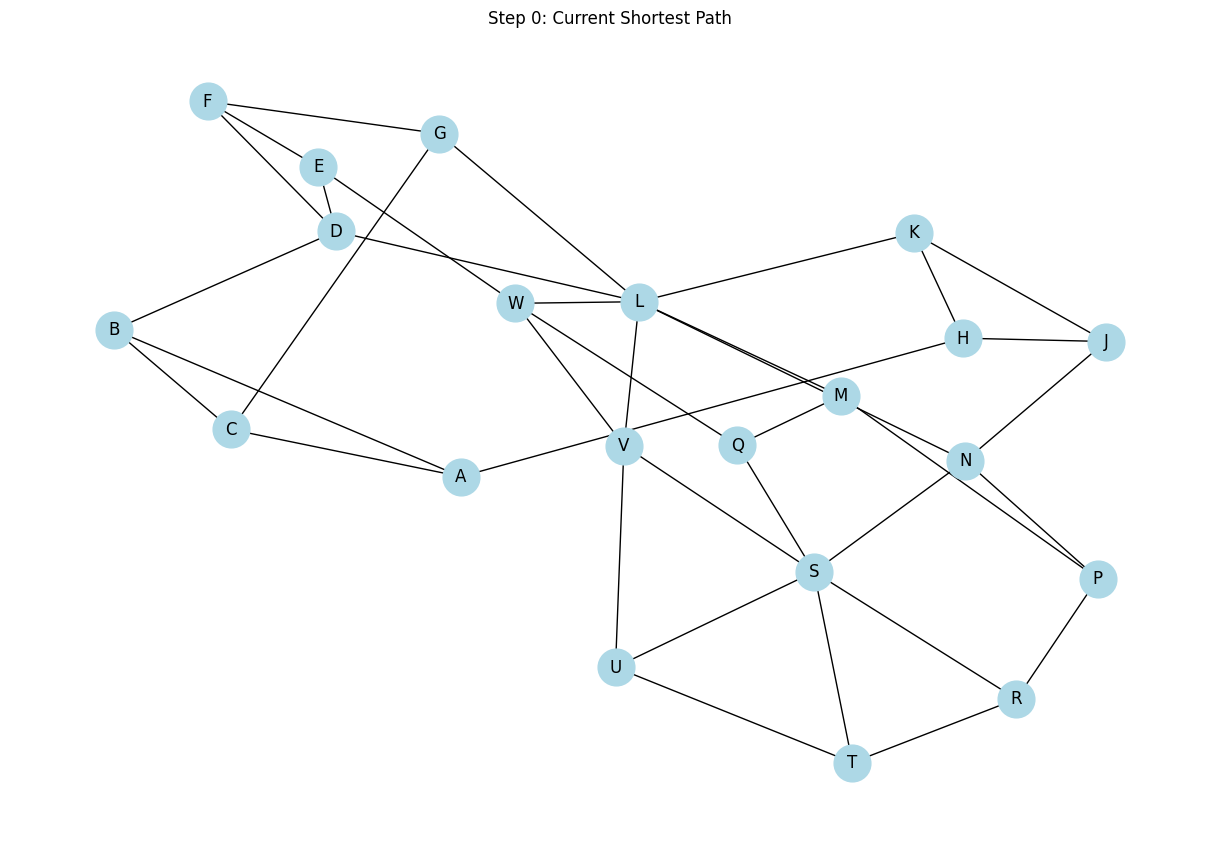

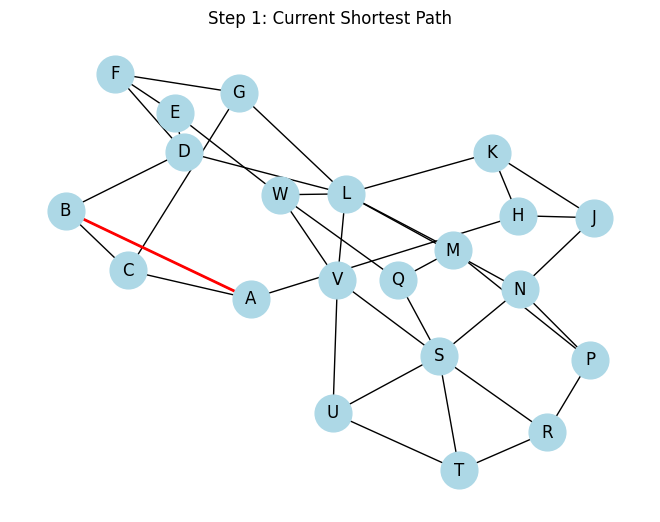

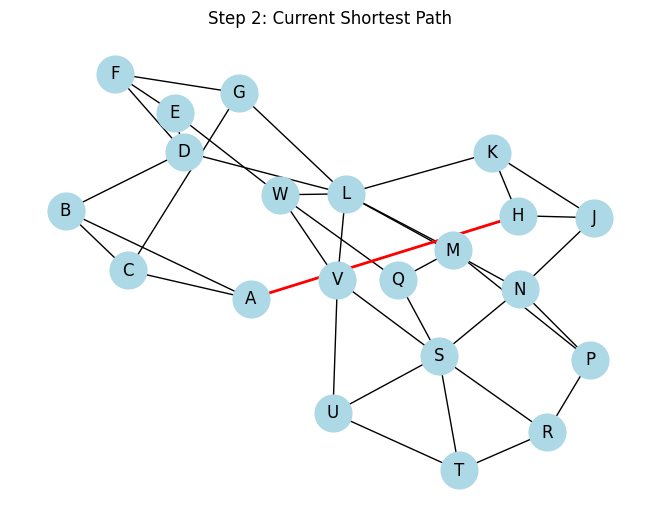

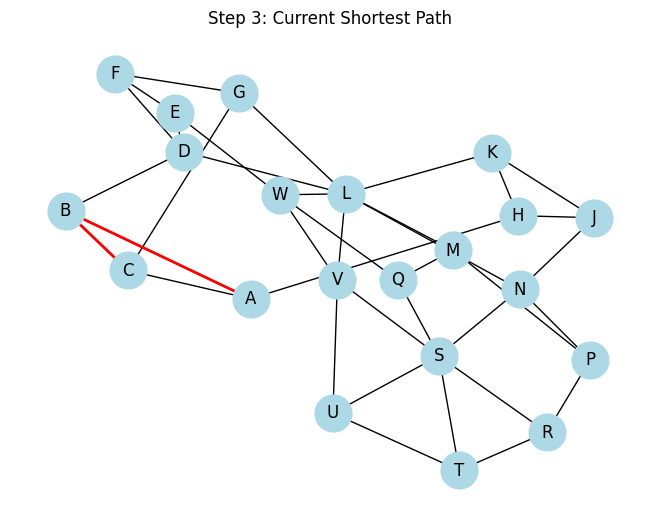

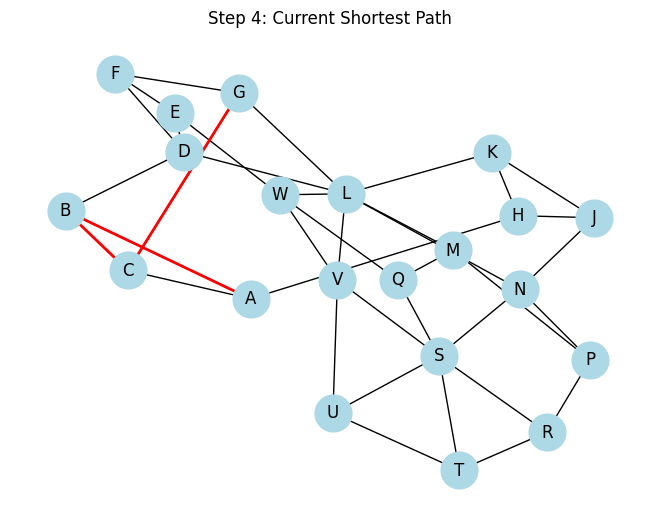

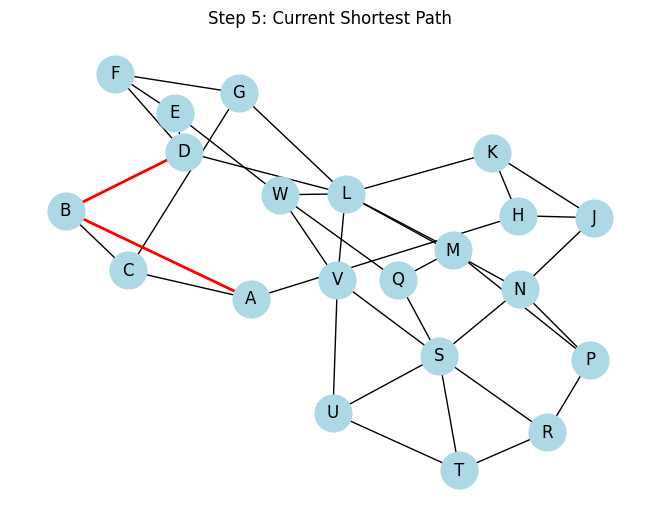

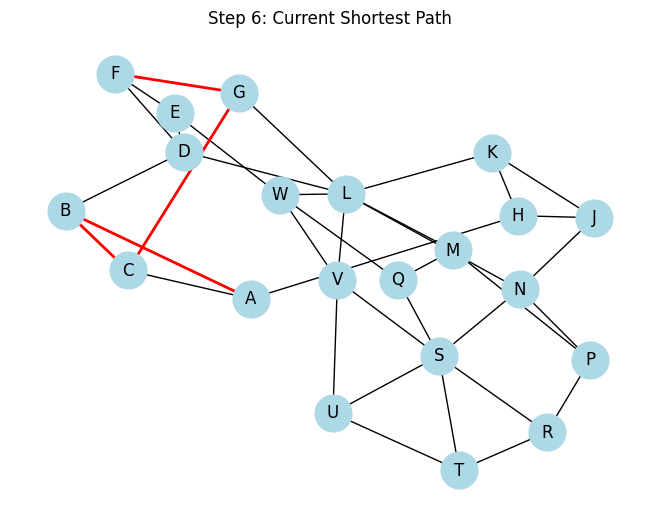

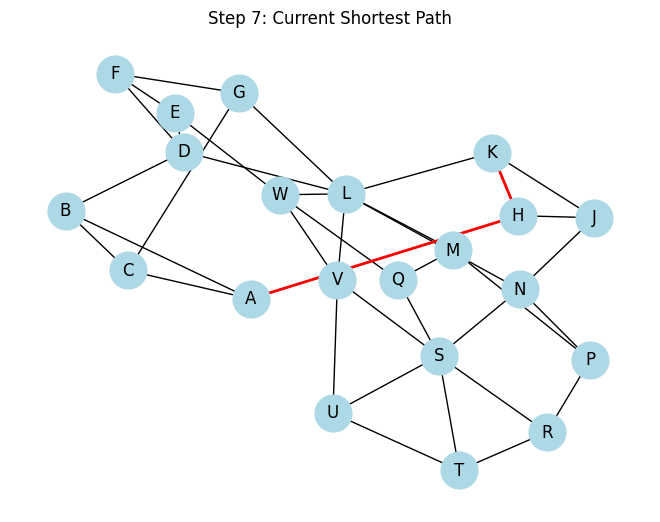

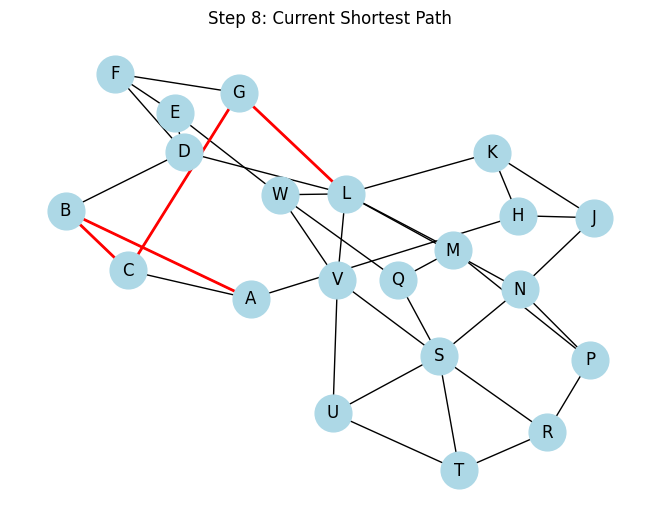

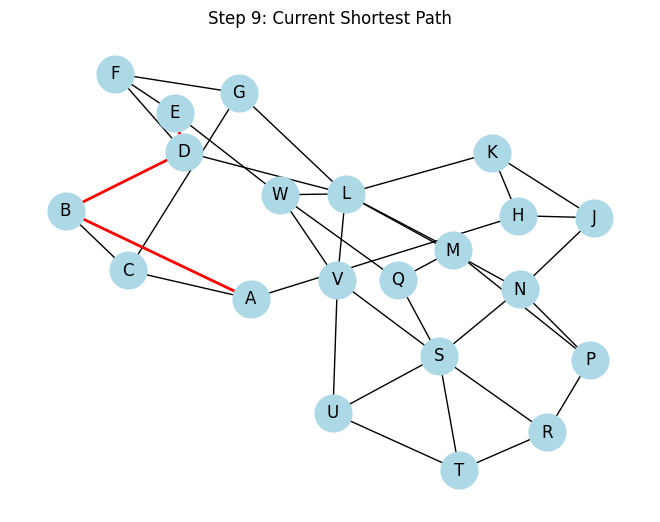

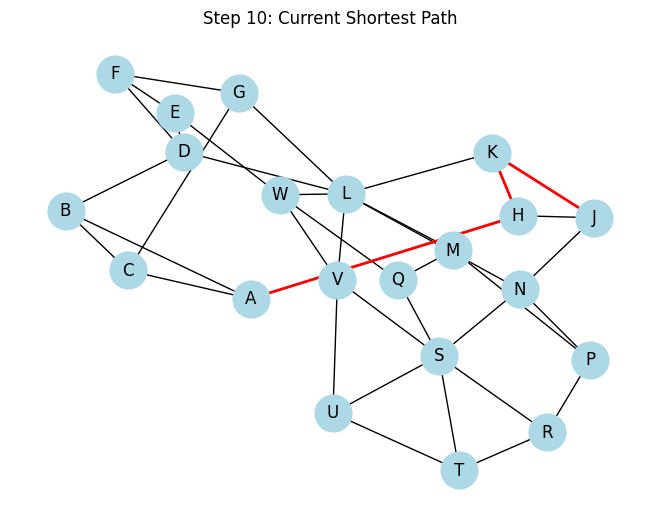

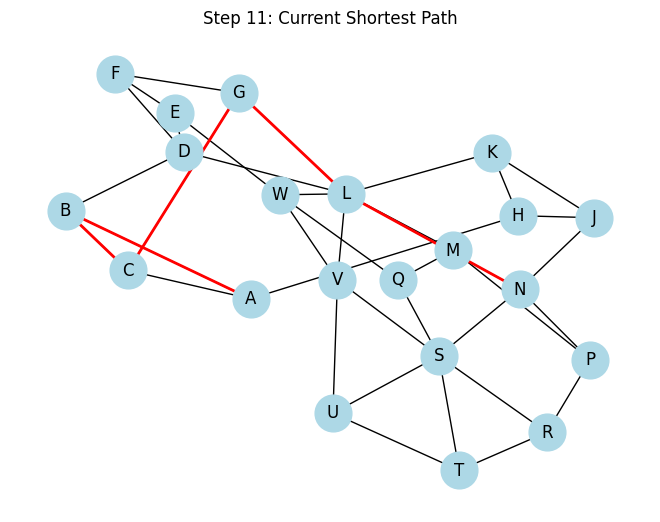

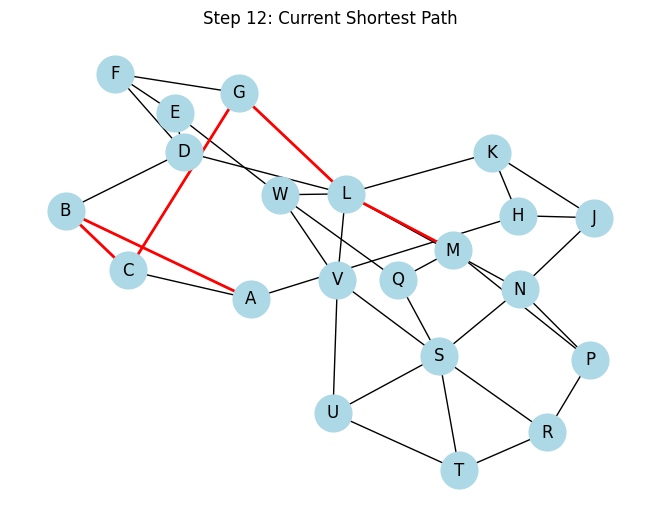

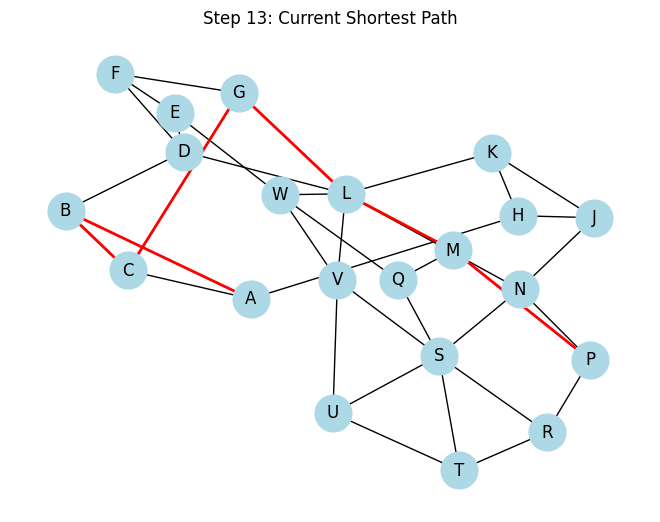

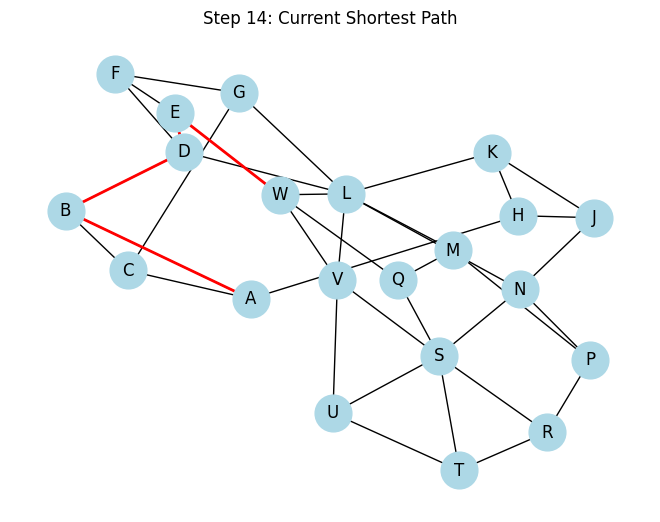

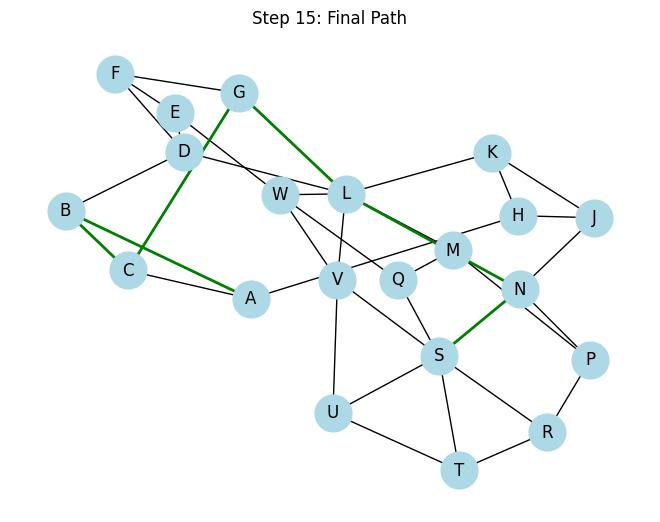

In [22]:
def dijkstra_path_visualization(graph, start, end):
    # Initialize priority queue
    queue = [(0, start, ())]  # (priority, node, path)
    seen = set()
    paths = {start: (None, 0)}  # {node: (previous_node, total_distance)}
    
    # Plot initial graph
    G_viz = nx.Graph()
    for node, edges in graph.items():
        for adjacent, weight in edges.items():
            G_viz.add_edge(node, adjacent, weight=weight)
    
    pos = nx.spring_layout(G_viz)
    plt.figure(figsize=(12, 8))
    
    # Run the algorithm
    step = 0
    while queue:
        (cost, v1, path) = heapq.heappop(queue)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == end:
                # Draw final path
                final_path = extract_path(path)
                final_edges = list(zip(final_path[:-1], final_path[1:]))
                nx.draw(G_viz, pos, with_labels=True, node_size=700, node_color='lightblue')
                nx.draw_networkx_edges(G_viz, pos, edgelist=final_edges, edge_color='green', width=2)
                plt.title(f'Step {step}: Final Path')
                plt.show()
                return (cost, path)
                
            for v2, c in graph.get(v1, {}).items():
                if v2 in seen: continue
                next = cost + c
                paths[v2] = (v1, next)
                heapq.heappush(queue, (next, v2, path))
            
            # Plot current state of the graph with the path so far
            current_path = extract_path(path)
            current_edges = list(zip(current_path[:-1], current_path[1:]))
            nx.draw(G_viz, pos, with_labels=True, node_size=700, node_color='lightblue')
            nx.draw_networkx_edges(G_viz, pos, edgelist=current_edges, edge_color='red', width=2)
            plt.title(f'Step {step}: Current Shortest Path')
            plt.show()
            step += 1

    return float("inf"), []

shortest_distance, shortest_path = dijkstra_path_visualization(graph, 'A', 'S')

# Reference
